In [ ]:
! pip install --user scipy wordcloud nltk seaborn textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

In [ ]:
covid_data = pd.read_csv('covid.csv')
non_covid_data = pd.read_csv('non_covid.csv')

In [ ]:
covid_data = covid_data.drop(columns=['concept_id', 'table'])

In [ ]:
covid_data = covid_data.drop(index = covid_data.index[3000:]) 

In [ ]:
covid_data = covid_data.rename(columns= {'concept_name': 'Medical_Term'})

In [ ]:
covid_data

,Medical_Term
0,Neoplasm of uncertain behavior of larynx
1,Sickle cell-hemoglobin SS disease
2,Hereditary elliptocytosis
3,Esophageal varices without bleeding
4,Edema of larynx
...,...
2995,Abnormal findings diagnostic imaging of liver+...
2996,Delayed milestone
2997,Taste sense altered
2998,Elevated levels of transaminase & lactic acid ...


In [ ]:
covid_data['Type'] = 1

In [ ]:
covid_data

,Medical_Term,Type
0,Neoplasm of uncertain behavior of larynx,1
1,Sickle cell-hemoglobin SS disease,1
2,Hereditary elliptocytosis,1
3,Esophageal varices without bleeding,1
4,Edema of larynx,1
...,...,...
2995,Abnormal findings diagnostic imaging of liver+...,1
2996,Delayed milestone,1
2997,Taste sense altered,1
2998,Elevated levels of transaminase & lactic acid ...,1


In [ ]:
non_covid_data = non_covid_data.drop(columns = ['Unnamed: 0'])

In [ ]:
non_covid_data['Type'] = 0

In [ ]:
non_covid_data = non_covid_data.drop(index = non_covid_data.index[3000:])

In [ ]:
total_data = pd.concat([covid_data,non_covid_data], ignore_index=True)

In [ ]:
total_data = total_data.sample(frac=1).reset_index(drop=True)

In [ ]:
total_data

,Medical_Term,Type
0,skin: triple-lumen catheter right,0
1,Open trimalleolar fracture,1
2,Female infertility of uterine origin,1
3,Chronic sphenoidal sinusitis,1
4,Intestinal adhesions with obstruction,1
...,...,...
5995,"renal failure, resolved acute now )",0
5996,er p diltiazem mg,0
5997,Disorder of lower leg,1
5998,probnp n-terminal,0


In [ ]:
import numpy as np
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
# nltk.download('wordnet')   # for Lemmatization

%matplotlib inline

In [ ]:
total_data

,Medical_Term,Type
0,skin: triple-lumen catheter right,0
1,Open trimalleolar fracture,1
2,Female infertility of uterine origin,1
3,Chronic sphenoidal sinusitis,1
4,Intestinal adhesions with obstruction,1
...,...,...
5995,"renal failure, resolved acute now )",0
5996,er p diltiazem mg,0
5997,Disorder of lower leg,1
5998,probnp n-terminal,0


In [ ]:
total_data['Medical_Term'].dtypes


dtype('O')

In [ ]:
total_data['Medical_Term'] = total_data['Medical_Term'].astype("string")
#df['id'] = df['id'].astype("string")
#total_data.Medical_Term.apply(str)

In [ ]:
total_data

,Medical_Term,Type
0,skin: triple-lumen catheter right,0
1,Open trimalleolar fracture,1
2,Female infertility of uterine origin,1
3,Chronic sphenoidal sinusitis,1
4,Intestinal adhesions with obstruction,1
...,...,...
5995,"renal failure, resolved acute now )",0
5996,er p diltiazem mg,0
5997,Disorder of lower leg,1
5998,probnp n-terminal,0


In [ ]:
total_data.describe()

,Type
count,6000.000000
mean,0.500000
std,0.500042
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [ ]:
total_data.dropna(inplace = True)
total_data.reset_index(drop=True)

,Medical_Term,Type
0,skin: triple-lumen catheter right,0
1,Open trimalleolar fracture,1
2,Female infertility of uterine origin,1
3,Chronic sphenoidal sinusitis,1
4,Intestinal adhesions with obstruction,1
...,...,...
5994,"renal failure, resolved acute now )",0
5995,er p diltiazem mg,0
5996,Disorder of lower leg,1
5997,probnp n-terminal,0


In [ ]:
total_data['Medical_Term'].dtypes

string[python]

In [ ]:
Category = total_data.columns.values[1]
Concept = total_data.columns.values[0]
Category, Concept

('Type', 'Medical_Term')

In [ ]:
'''for word in Concept.split():
    if word.lower() in contractions:
        Concept = Concept.replace(word, contractions[word.lower()])'''

'for word in Concept.split():\n    if word.lower() in contractions:\n        Concept = Concept.replace(word, contractions[word.lower()])'

In [ ]:
import re

def process_Concept(Concept):
    Concept = Concept.lower()
    Concept = re.sub('_[^\s]+', '', Concept)
    Concept = re.sub('@[^\s]+', '', Concept)                              # Removes usernames
    Concept = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', Concept)   # Remove URLs
    Concept = re.sub(r"\d+", " ", str(Concept))                           # Removes all digits
    Concept = re.sub('&quot;'," ", Concept)                               # Remove (&quot;) 
    Concept = re.sub(r"\b[a-zA-Z]\b", "", str(Concept))                   # Removes all single characters
    Concept = re.sub(r"[^\w\s]", " ", str(Concept))                       # Removes all punctuations
    Concept = re.sub(r'(.)\1+', r'\1\1', Concept)                         # Convert more than 2 letter repetitions to 2 letter
    
    Concept = re.sub(r"\s+", " ", str(Concept))                           # Replaces double spaces with single space    
    return Concept

In [ ]:
total_data['processed_Medical_Term'] = np.vectorize(process_Concept)(total_data['Medical_Term'])

In [ ]:
total_data['processed_Medical_Term']


0            skin triple lumen catheter right
1                  open trimalleolar fracture
2        female infertility of uterine origin
3                chronic sphenoidal sinusitis
4       intestinal adhesions with obstruction
                        ...                  
5995        renal failure resolved acute now 
5996                          er diltiazem mg
5997                    disorder of lower leg
5998                         probnp terminal 
5999                      only approximately 
Name: processed_Medical_Term, Length: 5999, dtype: object

In [ ]:
total_data.head(10)

,Medical_Term,Type,processed_Medical_Term
0,skin: triple-lumen catheter right,0,skin triple lumen catheter right
1,Open trimalleolar fracture,1,open trimalleolar fracture
2,Female infertility of uterine origin,1,female infertility of uterine origin
3,Chronic sphenoidal sinusitis,1,chronic sphenoidal sinusitis
4,Intestinal adhesions with obstruction,1,intestinal adhesions with obstruction
5,"decreased ms on _%#mmdd#%_, be will p mg contin",0,decreased ms on be will mg contin
6,knee fluid analysis pseudogout back came posi...,0,knee fluid analysis pseudogout back came posi...
7,Acute gastritis,1,acute gastritis
8,"embryo ivf in transfer , one",0,embryo ivf in transfer one
9,dose well encephalopathy increased promote he...,0,dose well encephalopathy increased promote he...


In [ ]:
len(total_data)

5999

In [ ]:
total_data.iloc[0 , :]

Medical_Term               skin: triple-lumen catheter right
Type                                                       0
processed_Medical_Term      skin triple lumen catheter right
Name: 0, dtype: object

In [ ]:
total_data['processed_Medical_Term'] = total_data['processed_Medical_Term'].astype("string")

In [ ]:
#total_data.drop([total_data.index[4409], total_data.index[19904], total_data.index[10202], total_data.index[23618], total_data.index[7795], total_data.index[8509], total_data.index[13747], total_data.index[31787], total_data.index[26924],total_data.index[10667],total_data.index[1095], total_data.index[9742]])

In [ ]:
total_data.dropna()

,Medical_Term,Type,processed_Medical_Term
0,skin: triple-lumen catheter right,0,skin triple lumen catheter right
1,Open trimalleolar fracture,1,open trimalleolar fracture
2,Female infertility of uterine origin,1,female infertility of uterine origin
3,Chronic sphenoidal sinusitis,1,chronic sphenoidal sinusitis
4,Intestinal adhesions with obstruction,1,intestinal adhesions with obstruction
...,...,...,...
5995,"renal failure, resolved acute now )",0,renal failure resolved acute now
5996,er p diltiazem mg,0,er diltiazem mg
5997,Disorder of lower leg,1,disorder of lower leg
5998,probnp n-terminal,0,probnp terminal


In [ ]:
total_data.reset_index()

,index,Medical_Term,Type,processed_Medical_Term
0,0,skin: triple-lumen catheter right,0,skin triple lumen catheter right
1,1,Open trimalleolar fracture,1,open trimalleolar fracture
2,2,Female infertility of uterine origin,1,female infertility of uterine origin
3,3,Chronic sphenoidal sinusitis,1,chronic sphenoidal sinusitis
4,4,Intestinal adhesions with obstruction,1,intestinal adhesions with obstruction
...,...,...,...,...
5994,5995,"renal failure, resolved acute now )",0,renal failure resolved acute now
5995,5996,er p diltiazem mg,0,er diltiazem mg
5996,5997,Disorder of lower leg,1,disorder of lower leg
5997,5998,probnp n-terminal,0,probnp terminal


**Spelling** **correction**


In [ ]:
from textblob import Blobber
from textblob.sentiments import NaiveBayesAnalyzer
tb = Blobber(analyzer=NaiveBayesAnalyzer())
total_data['processed_Medical_Term'].apply(lambda x: str(tb(x)))

0            skin triple lumen catheter right
1                  open trimalleolar fracture
2        female infertility of uterine origin
3                chronic sphenoidal sinusitis
4       intestinal adhesions with obstruction
                        ...                  
5995        renal failure resolved acute now 
5996                          er diltiazem mg
5997                    disorder of lower leg
5998                         probnp terminal 
5999                      only approximately 
Name: processed_Medical_Term, Length: 5999, dtype: object

In [ ]:
'''from textblob import TextBlob
total_data['processed_Medical_Term'].apply(lambda x: str(TextBlob(x).correct()))
total_data.head(10)'''

"from textblob import TextBlob\ntotal_data['processed_Medical_Term'].apply(lambda x: str(TextBlob(x).correct()))\ntotal_data.head(10)"

**Tokenization**



In [ ]:
tokenized_Concept = total_data['processed_Medical_Term'].apply(lambda x: x.split())
tokenized_Concept.head()

0        [skin, triple, lumen, catheter, right]
1                [open, trimalleolar, fracture]
2    [female, infertility, of, uterine, origin]
3              [chronic, sphenoidal, sinusitis]
4    [intestinal, adhesions, with, obstruction]
Name: processed_Medical_Term, dtype: object

**Stemming**


In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_Concept = tokenized_Concept.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_Concept.head()

0      [skin, tripl, lumen, cathet, right]
1            [open, trimalleolar, fractur]
2    [femal, infertil, of, uterin, origin]
3               [chronic, sphenoid, sinus]
4        [intestin, adhes, with, obstruct]
Name: processed_Medical_Term, dtype: object

**Lemmatization**



In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

tokenized_Concept = tokenized_Concept.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
tokenized_Concept.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


0      [skin, tripl, lumen, cathet, right]
1            [open, trimalleolar, fractur]
2    [femal, infertil, of, uterin, origin]
3               [chronic, sphenoid, sinus]
4        [intestin, adhes, with, obstruct]
Name: processed_Medical_Term, dtype: object

**Stop** **words**

In [ ]:
stop_words = {"i", "me", "my", "myself", "we", "our", "ours", "ourselves",
             "you", "your", "yours", "yourself", "yourselves", "he", "him",
             "his", "himself", "she", "her", "hers", "herself", "it", "its",
            "itself", "they", "them", "their", "theirs", "themselves", "what",
             "which", "who", "whom", "this", "that", "these", "those", "am", "is",
             "are", "was", "were", "be", "been", "being", "have", "has", "had",
             "having", "do", "does", "did", "doing", "a", "an", "the", "and",
             "but", "if", "or", "because", "as", "until", "while", "of", "at",
             "by", "for", "with", "about", "against", "between", "into", "through",
             "during", "before", "after", "above", "below", "to", "from", "up",
             "down", "in", "out", "on", "off", "over", "under", "again", "further",
             "then", "once", "here", "there", "when", "where", "why", "how", "all",
             "any", "both", "each", "few", "more", "most", "other", "some", "such",
             "only", "own", "same", "so", "than", "too", "very",
             "can", "will", "just", "should", "now"}


**Stiching**


In [ ]:
type(tokenized_Concept)

pandas.core.series.Series

In [ ]:
tokenized_Concept

0         [skin, tripl, lumen, cathet, right]
1               [open, trimalleolar, fractur]
2       [femal, infertil, of, uterin, origin]
3                  [chronic, sphenoid, sinus]
4           [intestin, adhes, with, obstruct]
                        ...                  
5995       [renal, failur, resolv, acut, now]
5996                      [er, diltiazem, mg]
5997                 [disord, of, lower, leg]
5998                         [probnp, termin]
5999                         [onli, approxim]
Name: processed_Medical_Term, Length: 5999, dtype: object

In [ ]:
#tokenized_Concept[29849]


In [ ]:
total_data['processed_Medical_Term'] = tokenized_Concept
total_data

,Medical_Term,Type,processed_Medical_Term
0,skin: triple-lumen catheter right,0,"[skin, tripl, lumen, cathet, right]"
1,Open trimalleolar fracture,1,"[open, trimalleolar, fractur]"
2,Female infertility of uterine origin,1,"[femal, infertil, of, uterin, origin]"
3,Chronic sphenoidal sinusitis,1,"[chronic, sphenoid, sinus]"
4,Intestinal adhesions with obstruction,1,"[intestin, adhes, with, obstruct]"
...,...,...,...
5995,"renal failure, resolved acute now )",0,"[renal, failur, resolv, acut, now]"
5996,er p diltiazem mg,0,"[er, diltiazem, mg]"
5997,Disorder of lower leg,1,"[disord, of, lower, leg]"
5998,probnp n-terminal,0,"[probnp, termin]"


In [ ]:

def tokenize(tokenized_Concept_):
    tokenized_Concept_ = ' '.join([word for word in tokenized_Concept_ if word not in stop_words])
    return tokenized_Concept_
    
total_data['processed_Medical_Term'] = total_data['processed_Medical_Term'].apply(tokenize)
total_data.head()

,Medical_Term,Type,processed_Medical_Term
0,skin: triple-lumen catheter right,0,skin tripl lumen cathet right
1,Open trimalleolar fracture,1,open trimalleolar fractur
2,Female infertility of uterine origin,1,femal infertil uterin origin
3,Chronic sphenoidal sinusitis,1,chronic sphenoid sinus
4,Intestinal adhesions with obstruction,1,intestin adhes obstruct


In [ ]:
total_data

,Medical_Term,Type,processed_Medical_Term
0,skin: triple-lumen catheter right,0,skin tripl lumen cathet right
1,Open trimalleolar fracture,1,open trimalleolar fractur
2,Female infertility of uterine origin,1,femal infertil uterin origin
3,Chronic sphenoidal sinusitis,1,chronic sphenoid sinus
4,Intestinal adhesions with obstruction,1,intestin adhes obstruct
...,...,...,...
5995,"renal failure, resolved acute now )",0,renal failur resolv acut
5996,er p diltiazem mg,0,er diltiazem mg
5997,Disorder of lower leg,1,disord lower leg
5998,probnp n-terminal,0,probnp termin


In [ ]:
#total_data.drop(columns=['processed_Medical_Term'])

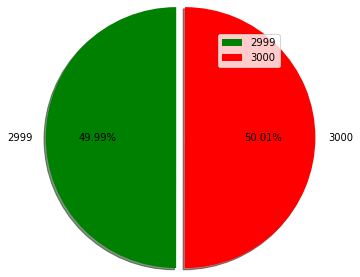

In [ ]:
slices = [(total_data['Type'] != 1).sum(), (total_data['Type'] == 1).sum()]  
colors = ['g', 'r'] 
plt.pie(slices, labels = slices, colors=colors, startangle=90, shadow = True, explode = (0, 0.1), radius = 1.5, autopct = '%1.2f%%') 
plt.legend()
plt.show()

**Most used positive words**

In [ ]:
total_data

,Medical_Term,Type,processed_Medical_Term
0,skin: triple-lumen catheter right,0,skin tripl lumen cathet right
1,Open trimalleolar fracture,1,open trimalleolar fractur
2,Female infertility of uterine origin,1,femal infertil uterin origin
3,Chronic sphenoidal sinusitis,1,chronic sphenoid sinus
4,Intestinal adhesions with obstruction,1,intestin adhes obstruct
...,...,...,...
5995,"renal failure, resolved acute now )",0,renal failur resolv acut
5996,er p diltiazem mg,0,er diltiazem mg
5997,Disorder of lower leg,1,disord lower leg
5998,probnp n-terminal,0,probnp termin


In [ ]:
#" ".join(list(total_data['processed_Concept'][0]))

In [ ]:
'''for text in total_data['processed_Concept'][total_data['Type'] == 'covid']:
    text_ = " ".join(text)
    print(text_)
#total_data['processed_Concept'][total_data['Type'] == 'covid']'''

'for text in total_data[\'processed_Concept\'][total_data[\'Type\'] == \'covid\']:\n    text_ = " ".join(text)\n    print(text_)\n#total_data[\'processed_Concept\'][total_data[\'Type\'] == \'covid\']'

<Figure size 3600x2400 with 0 Axes>

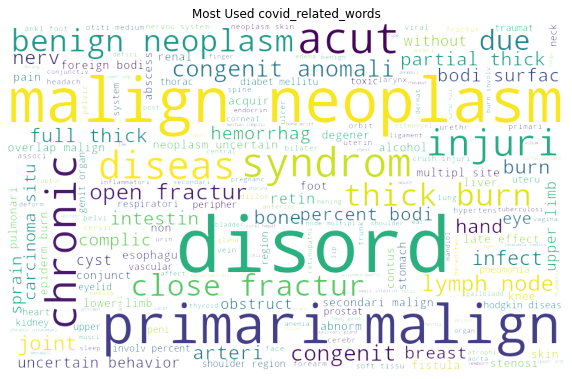

In [ ]:
covid_related_words =' '.join([text for text in total_data['processed_Medical_Term'][total_data['Type'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21,
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(covid_related_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Used covid_related_words")
#plt.savefig('assets/covid_related_words.png')
plt.show()

<Figure size 3600x2400 with 0 Axes>

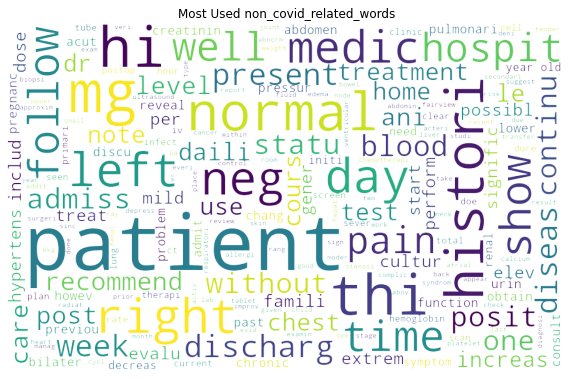

In [ ]:
non_covid_related_words =' '.join([text for text in total_data['processed_Medical_Term'][total_data['Type'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21,
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(non_covid_related_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Used non_covid_related_words")
#plt.savefig('assets/covid_related_words.png')
plt.show()

In [ ]:
total_data = total_data.drop(columns = ['Medical_Term'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(total_data['processed_Medical_Term'], total_data['Type'],
                                                    test_size=0.2, random_state=69)  

In [ ]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (4799,)
X_test_shape :  (1200,)
y_train_shape :  (4799,)
y_test_shape :  (1200,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1,2), stop_words = 'english')    # Unigram and Bigram
#final_vectorized_data = count_vectorizer.fit_transform(total_data['processed_Medical_Term'])  
#final_vectorized_data 

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer 

# tf_idf_vectorizer = TfidfVectorizer(use_idf=True,ngram_range=(1,3))
# final_vectorized_data = tf_idf_vectorizer.fit_transform(total_data['processed_Concept'])

# final_vectorized_data

In [ ]:
BOW_train = count_vectorizer.fit_transform(X_train).toarray()
BOW_train_Df = pd.DataFrame(BOW_train, columns = count_vectorizer.get_feature_names())
BOW_train_Df[:4]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aa attend,aa follow,aa group,aa particip,aa peer,aa potenti,aa time,ab,ab gravida,...,zyloprim,zyloprim protonix,zyvox,zyvox vancomycin,卢ni,卢ni 驴re,卢zari,卢zari diseas,驴re,驴re diseas
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test

4526                                extrem upper pain leg
1580                                close fractur scapula
4560        week mayb recommend within neurologist follow
5027                                antibodi anti gbm neg
4023                              non immun hydrop fetali
                              ...                        
1211                                      dilat mildli lv
5945                                     bradycardia sinu
4537                 mood affect congruent patient euthym
1473                                               mycosi
771     osteoporosi scoliosi lumbar fractur spine reve...
Name: processed_Medical_Term, Length: 1200, dtype: object

In [ ]:
BOW_test = count_vectorizer.transform(X_test).toarray()
BOW_test_Df = pd.DataFrame(BOW_test, columns = count_vectorizer.get_feature_names())
BOW_test_Df[:4]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aa attend,aa follow,aa group,aa particip,aa peer,aa potenti,aa time,ab,ab gravida,...,zyloprim,zyloprim protonix,zyvox,zyvox vancomycin,卢ni,卢ni 驴re,卢zari,卢zari diseas,驴re,驴re diseas
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
BOW_train_Df["Category_Values"] = y_train.reset_index()["Type"]
BOW_test_Df["Category_Values"] = y_test.reset_index()["Type"]
BOW_train_Df.head(5)

,aa,aa attend,aa follow,aa group,aa particip,aa peer,aa potenti,aa time,ab,ab gravida,...,zyloprim protonix,zyvox,zyvox vancomycin,卢ni,卢ni 驴re,卢zari,卢zari diseas,驴re,驴re diseas,Category_Values
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cons_df = BOW_train_Df.groupby("Category_Values",as_index = False).sum().reset_index(drop=True)

In [ ]:
cons_df

,Category_Values,aa,aa attend,aa follow,aa group,aa particip,aa peer,aa potenti,aa time,ab,...,zyloprim,zyloprim protonix,zyvox,zyvox vancomycin,卢ni,卢ni 驴re,卢zari,卢zari diseas,驴re,驴re diseas
0,0,12,1,1,6,1,1,1,1,11,...,1,1,1,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,2,2,1,1


In [ ]:
Category_Count_df = BOW_train_Df["Category_Values"].value_counts().reset_index()

In [ ]:
Category_Count_df

,index,Category_Values
0,1,2401
1,0,2398


In [ ]:
Category_Count_df.columns = ["Category_Values", "Category_Count"]

In [ ]:
Category_Count_df.columns

Index(['Category_Values', 'Category_Count'], dtype='object')

In [ ]:
Cons_df = pd.merge(cons_df,Category_Count_df,on="Category_Values",how = "left")

In [ ]:
Cons_df

,Category_Values,aa,aa attend,aa follow,aa group,aa particip,aa peer,aa potenti,aa time,ab,...,zyloprim protonix,zyvox,zyvox vancomycin,卢ni,卢ni 驴re,卢zari,卢zari diseas,驴re,驴re diseas,Category_Count
0,0,12,1,1,6,1,1,1,1,11,...,1,1,1,0,0,0,0,0,0,2398
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,2,2,1,1,2401


In [ ]:
Cons_df["sum_all_words"] = Cons_df.drop(["Category_Count","Category_Values"],axis = 1).sum(axis = 1)

In [ ]:
Cons_df

,Category_Values,aa,aa attend,aa follow,aa group,aa particip,aa peer,aa potenti,aa time,ab,...,zyvox,zyvox vancomycin,卢ni,卢ni 驴re,卢zari,卢zari diseas,驴re,驴re diseas,Category_Count,sum_all_words
0,0,12,1,1,6,1,1,1,1,11,...,1,1,0,0,0,0,0,0,2398,24956
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,2,2,1,1,2401,12263


In [ ]:
alpha = 1
prob_table = pd.DataFrame()
prob_table["Category_Values"] = Cons_df["Category_Values"]

In [ ]:
prob_table

,Category_Values
0,0
1,1


In [ ]:
prob_table["p_C"] = Cons_df["Category_Count"]/Cons_df["Category_Count"].sum()

In [ ]:
prob_table

,Category_Values,p_C
0,0,0.499687
1,1,0.500313


In [ ]:
cols = [col for col in Cons_df.columns if col not in ["Category_Values", "Category_Count", "sum_all_words"]]


In [ ]:
no_of_cols = len(cols)
for col in cols:
    prob_table[col] = np.log((Cons_df[col]+alpha)/(Cons_df["sum_all_words"] + (alpha*no_of_cols)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
prob_table

,Category_Values,p_C,aa,aa attend,aa follow,aa group,aa particip,aa peer,aa potenti,aa time,...,zyloprim,zyloprim protonix,zyvox,zyvox vancomycin,卢ni,卢ni 驴re,卢zari,卢zari diseas,驴re,驴re diseas
0,0,0.499687,-8.097473,-9.969275,-9.969275,-8.716512,-9.969275,-9.969275,-9.969275,-9.969275,...,-9.969275,-9.969275,-9.969275,-9.969275,-10.662422,-10.662422,-10.662422,-10.662422,-10.662422,-10.662422
1,1,0.500313,-10.309852,-10.309852,-10.309852,-10.309852,-10.309852,-10.309852,-10.309852,-10.309852,...,-10.309852,-10.309852,-10.309852,-10.309852,-9.616705,-9.616705,-9.211240,-9.211240,-9.616705,-9.616705


In [ ]:
prob_table.iloc[:, range(prob_table.shape[1])[2:]].sum(axis=1)

0   -177933.566079
1   -178318.393026
dtype: float64

In [ ]:
prob_table["p_C"] = np.log(prob_table["p_C"])

In [ ]:
prob_table

,Category_Values,p_C,aa,aa attend,aa follow,aa group,aa particip,aa peer,aa potenti,aa time,...,zyloprim,zyloprim protonix,zyvox,zyvox vancomycin,卢ni,卢ni 驴re,卢zari,卢zari diseas,驴re,驴re diseas
0,0,-0.693773,-8.097473,-9.969275,-9.969275,-8.716512,-9.969275,-9.969275,-9.969275,-9.969275,...,-9.969275,-9.969275,-9.969275,-9.969275,-10.662422,-10.662422,-10.662422,-10.662422,-10.662422,-10.662422
1,1,-0.692522,-10.309852,-10.309852,-10.309852,-10.309852,-10.309852,-10.309852,-10.309852,-10.309852,...,-10.309852,-10.309852,-10.309852,-10.309852,-9.616705,-9.616705,-9.211240,-9.211240,-9.616705,-9.616705


In [ ]:
max(prob_table.iloc[0])

0.0

In [ ]:
train_array = prob_table.drop(["Category_Values","p_C",],axis = 1)


In [ ]:
train_array

,aa,aa attend,aa follow,aa group,aa particip,aa peer,aa potenti,aa time,ab,ab gravida,...,zyloprim,zyloprim protonix,zyvox,zyvox vancomycin,卢ni,卢ni 驴re,卢zari,卢zari diseas,驴re,驴re diseas
0,-8.097473,-9.969275,-9.969275,-8.716512,-9.969275,-9.969275,-9.969275,-9.969275,-8.177516,-9.969275,...,-9.969275,-9.969275,-9.969275,-9.969275,-10.662422,-10.662422,-10.662422,-10.662422,-10.662422,-10.662422
1,-10.309852,-10.309852,-10.309852,-10.309852,-10.309852,-10.309852,-10.309852,-10.309852,-10.309852,-10.309852,...,-10.309852,-10.309852,-10.309852,-10.309852,-9.616705,-9.616705,-9.211240,-9.211240,-9.616705,-9.616705


In [ ]:
train_array = np.array(train_array)

In [ ]:
predict_df = pd.DataFrame(np.dot(BOW_test,train_array.T) + np.array(prob_table["p_C"]),columns=["0", "1"])

In [ ]:
predict_df

,0,1
0,-39.828401,-40.744012
1,-49.361494,-37.220300
2,-30.242118,-39.447025
3,-44.350859,-51.548636
4,-17.318137,-18.914331
...,...,...
1195,-27.382723,-30.523467
1196,-18.617420,-19.232785
1197,-24.181196,-28.220882
1198,-11.356195,-8.922933


In [ ]:
BOW_test_Df

,aa,aa attend,aa follow,aa group,aa particip,aa peer,aa potenti,aa time,ab,ab gravida,...,zyloprim protonix,zyvox,zyvox vancomycin,卢ni,卢ni 驴re,卢zari,卢zari diseas,驴re,驴re diseas,Category_Values
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
predict_df["final_category"] = predict_df.idxmax(axis = 1)
predict_df["Original_Cateogry"] = BOW_test_Df["Category_Values"]

In [ ]:
predict_df

,0,1,final_category,Original_Cateogry
0,-39.828401,-40.744012,0,0
1,-49.361494,-37.220300,1,1
2,-30.242118,-39.447025,0,0
3,-44.350859,-51.548636,0,0
4,-17.318137,-18.914331,0,1
...,...,...,...,...
1195,-27.382723,-30.523467,0,0
1196,-18.617420,-19.232785,0,0
1197,-24.181196,-28.220882,0,0
1198,-11.356195,-8.922933,1,1


In [ ]:
pd.crosstab(predict_df["final_category"], predict_df["Original_Cateogry"] )

Original_Cateogry,0,1
final_category,,
0,549,40
1,52,559


In [ ]:
test_temp_data = pd.read_csv('test_temp_dataset.csv')

In [ ]:
test_temp_data = test_temp_data[['Abbreviations', 'Category', 'processed_Medical_Term', 'Medical_Concept']]

In [ ]:
test_temp_data = test_temp_data.dropna()

In [ ]:
for index, rows in test_temp_data.iterrows():
    rows['Category'] = int(rows['Category'])

In [ ]:
test_temp_data

,Abbreviations,Category,processed_Medical_Term,Medical_Concept
0,OI,0.0,ovul induct rpons ov exogen stimul dt indt method,Ovulation induction is the response of the ova...
1,HFRS,1.0,thi wa nationwid cohort studi conduct hospit t...,This was a nationwide cohort study conducted a...
2,LDH,0.0,lifetim drink histori ha use examin alcohol u...,The Lifetime Drinking History (LDH) has been u...
3,ARI,0.0,aldos ructas inhibitor class drug studi way pr...,Aldose reductase inhibitors are a class of dru...
4,SD,0.0,stl diseas tegori not includ evalu ovel treatm...,Stable disease is a category which is not incl...
...,...,...,...,...
175,URT,1.0,sar cov initi inft upp rpitori tct fst intt im...,SARS-CoV-2 initially infects the upper respira...
176,CVP,0.0,prent dure pregnanc inguin lymphadenopathi cel...,she presented during pregnancy in 2000 with in...
177,AGP,1.0,aosol gen procur dib tiv rult releas small ab...,An Aerosol Generating Procedure (AGP) describe...
178,IR,1.0,immun system regard prott human bodi covid lus...,the immune system regarding its protection of ...


In [ ]:
BOW_test_1 = count_vectorizer.transform(test_temp_data['processed_Medical_Term'].values.astype('U')).toarray()

In [ ]:
print(test_temp_data['processed_Medical_Term'])
                           

0      ovul induct rpons ov exogen stimul dt indt method
1      thi wa nationwid cohort studi conduct hospit t...
2      lifetim drink histori  ha use examin alcohol u...
3      aldos ructas inhibitor class drug studi way pr...
4      stl diseas tegori not includ evalu ovel treatm...
                             ...                        
175    sar cov initi inft upp rpitori tct fst intt im...
176    prent dure pregnanc inguin lymphadenopathi cel...
177    aosol gen procur  dib tiv rult releas small ab...
178    immun system regard prott human bodi covid lus...
179    return ovsea fipino foreign nation tvel phippi...
Name: processed_Medical_Term, Length: 178, dtype: object


In [ ]:
BOW_test_1.shape

(178, 17764)

In [ ]:
train_array.shape

(2, 17764)

In [ ]:
predict_df_1 = pd.DataFrame(np.dot(BOW_test_1,train_array.T) + np.array(prob_table["p_C"]),columns=["0", "1"])

In [ ]:
def pred(statement, abbrv):
    print(type(statement))
    pred1 = count_vectorizer.transform(statement.values.astype('U')).toarray()

    
    h = np.multiply(train_array, pred1)
    a = 1*(h[0,:] > h[1,:])
    print(a.shape)
    b = 1*(h[0,:] < h[1,:])
    print(b.shape)
    con = np.vstack((a, b))
    print(con)
    s = np.sum(con, axis=1)
    print(s)
    return (s[1]/(s[0]+s[1]), abbrv)
    #pd.DataFrame(np.dot(pred1, train_array.T)  + np.array(prob_table["p_C"], columns=['0','1'])



In [ ]:
index_ = 1
st = pd.Series([test_temp_data['processed_Medical_Term'][index_]])
abbrv = test_temp_data['Abbreviations'][index_]
pred(st, abbrv)

<class 'pandas.core.series.Series'>
(17764,)
(17764,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[14  2]


(0.125, 'HFRS')

In [ ]:
predict_df_1

,0,1
0,-29.908451,-31.622079
1,-147.389288,-190.693611
2,-109.043233,-131.254866
3,-73.856301,-76.368946
4,-29.292987,-36.869336
...,...,...
173,-52.823262,-60.354411
174,-222.143085,-226.120913
175,-28.586695,-29.542637
176,-78.012589,-89.492209


In [ ]:
predict_df_1["final_category"] = predict_df_1.idxmax(axis = 1)
predict_df_1["Original_Cateogry"] = test_temp_data["Category"]
predict_df_1

,0,1,final_category,Original_Cateogry
0,-29.908451,-31.622079,0,0.0
1,-147.389288,-190.693611,0,1.0
2,-109.043233,-131.254866,0,0.0
3,-73.856301,-76.368946,0,0.0
4,-29.292987,-36.869336,0,0.0
...,...,...,...,...
173,-52.823262,-60.354411,0,0.0
174,-222.143085,-226.120913,0,1.0
175,-28.586695,-29.542637,0,1.0
176,-78.012589,-89.492209,0,0.0


In [ ]:
predict_df_1 = predict_df_1.fillna(0)
predict_df_1['Original_Cateogry'] = predict_df_1['Original_Cateogry'].astype(int)
predict_df_1

,0,1,final_category,Original_Cateogry
0,-29.908451,-31.622079,0,0
1,-147.389288,-190.693611,0,1
2,-109.043233,-131.254866,0,0
3,-73.856301,-76.368946,0,0
4,-29.292987,-36.869336,0,0
...,...,...,...,...
173,-52.823262,-60.354411,0,0
174,-222.143085,-226.120913,0,1
175,-28.586695,-29.542637,0,1
176,-78.012589,-89.492209,0,0


In [ ]:
pd.crosstab(predict_df_1["final_category"], predict_df_1["Original_Cateogry"] )

Original_Cateogry,0,1
final_category,,
0,96,54
1,19,9


In [ ]:
BOW_test_Df = pd.DataFrame(BOW_test_1, columns = count_vectorizer.get_feature_names())
BOW_test_Df[:4]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aa attend,aa follow,aa group,aa particip,aa peer,aa potenti,aa time,ab,ab gravida,...,zyloprim,zyloprim protonix,zyvox,zyvox vancomycin,卢ni,卢ni 驴re,卢zari,卢zari diseas,驴re,驴re diseas
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Efficient implementation

In [ ]:
alpha = 1

In [ ]:
Cnt_Vec = CountVectorizer(stop_words="english")


In [ ]:
BOW_train = Cnt_Vec.fit_transform(X_train).toarray()
BOW_test = Cnt_Vec.transform(X_test).toarray()

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lbl = LabelBinarizer()
train_Y = lbl.fit_transform(y_train)


In [ ]:
train_Y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [ ]:
if train_Y.shape[1] == 1:
    train_Y = np.concatenate([1 - train_Y, train_Y], axis=1)
train_Y


array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]])

In [ ]:
cat_count_arr = np.log(np.sum(train_Y,axis = 0)/np.sum(train_Y))
cat_count_arr


array([-0.69377251, -0.69252225])

In [ ]:
classes = lbl.classes_

In [ ]:
classes

array([0, 1])

In [ ]:
train_Y.shape

(4799, 2)

In [ ]:
BOW_train.shape

(4799, 4311)

In [ ]:
consolidated_train_df = np.dot(np.transpose(train_Y),BOW_train)

In [ ]:
consolidated_train_df

array([[12, 11,  1, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  1,  2,  1]])

In [ ]:
prob_table_numer = consolidated_train_df + alpha
prob_table_numer


array([[13, 12,  2, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  2,  3,  2]])

In [ ]:
prob_table_denom = np.sum(prob_table_numer,axis=1)
prob_table_denom


array([17975, 11643])

In [ ]:
prob_table = np.log(prob_table_numer) - np.log(prob_table_denom.reshape(-1,1))
prob_table

array([[-7.23178783, -7.31183053, -9.10359   , ..., -9.79673718,
        -9.79673718, -9.79673718],
       [-9.36246042, -9.36246042, -9.36246042, ..., -8.66931324,
        -8.26384813, -8.66931324]])

In [ ]:
prob_table.shape

(2, 4311)

In [ ]:
predict_arr = classes[np.argmax(np.dot(BOW_test,np.transpose(prob_table)) + cat_count_arr,axis=1)]
predict_arr

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
predict_arr.shape

(1200,)

In [ ]:
pd.crosstab(predict_arr, y_test)

Type,0,1
row_0,,
0,535,40
1,66,559


In [ ]:
'''from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train)''' 


'from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier\n\nmodel_naive = MultinomialNB().fit(X_train, y_train)'

In [ ]:
#model_naive

In [ ]:
#predicted_naive = model_naive.predict(X_test)

In [ ]:
'''from sklearn.metrics import confusion_matrix

plt.figure(figsize = (2,2),dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
#plt.savefig("assets/confusion_matrix.png")
plt.show()

NameError: ignored

<Figure size 1200x1200 with 0 Axes>

In [ ]:
'''from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)'''

In [ ]:
#from sklearn.metrics import classification_report
#print(classification_report(y_test, predicted_naive))

In [ ]:
'''from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# calculate the fpr and tpr for all thresholds of the classification
probs = model_naive.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(2,2),dpi=300)                      # to plot high quality graph
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate', color='g')
plt.xlabel('False Positive Rate', color='r')
#plt.savefig("assets/ROC_curve.png")
plt.show()'''

#Test DATA 

In [ ]:
test_data_covid = pd.read_csv('test_data_covid.csv', usecols=['SYNTAX'])


In [ ]:
test_data_covid = test_data_covid.dropna()


In [ ]:
test_data_covid

,SYNTAX
0,Acute respiratory infection is an infection th...
1,"Acute kidney injury (AKI), also known as acute..."
2,Aldose reductase inhibitors are a class of dru...
3,The absolute risk increase is essentially the ...
5,The purpose of in vitro study was to investiga...
...,...
257,mean airway pressure is the average pressure y...
258,Medicare Advantage can become expensive if you...
259,Microtubule-associated proteins (MAPs) regulat...
261,The World Health Organization is a specialized...


In [ ]:
test_data_covid = test_data_covid.reset_index(drop = True)

In [ ]:
test_data_covid

,SYNTAX
0,Acute respiratory infection is an infection th...
1,"Acute kidney injury (AKI), also known as acute..."
2,Aldose reductase inhibitors are a class of dru...
3,The absolute risk increase is essentially the ...
4,The purpose of in vitro study was to investiga...
...,...
188,mean airway pressure is the average pressure y...
189,Medicare Advantage can become expensive if you...
190,Microtubule-associated proteins (MAPs) regulat...
191,The World Health Organization is a specialized...


In [ ]:
test_data_covid = test_data_covid.rename({'SYNTAX': 'Medical_Term'}, axis=1)

In [ ]:
vectorized_test_data = count_vectorizer.fit_transform(test_data_covid['Medical_Term'])   
vectorized_test_data

<193x5381 sparse matrix of type '<class 'numpy.int64'>'
	with 6709 stored elements in Compressed Sparse Row format>

In [ ]:
type(test_data_covid)

pandas.core.frame.DataFrame

In [ ]:
#predicted_naive = model_naive.predict(vectorized_test_data)